<a href="https://colab.research.google.com/github/RajeshkumarA/Springboard_assignments/blob/main/EDA_Capstone_Project_II_Rajesh%20Ananthula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Housing data Prediction in USA

Our analysis of American housing data shows key factors influencing prices. Living Space, Baths, and Median Household Income strongly correlate with Price. Larger homes, more bathrooms, and higher income areas mean higher prices. Statistical tests confirm these positive relationships are significant. However, individual features like Living Space only explain a portion of price variation. Categorical features, especially State, significantly impact housing prices. Prices vary considerably across different states in the dataset. Zip Code related features show weaker correlations, needing more investigation. Location (Latitude/Longitude) also plays a role in pricing. These findings are crucial for selecting and engineering features for a predictive model.

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import pickle
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Do not wrap lines
pd.set_option('display.width', 0)  # Automatically adjust the width to the terminal

In [2]:
# Import dataset
df = pd.read_csv('/content/dataset/American_Housing_Data_20231209.csv')

# Exploring the numerical feature relationships


Our exploration began by examining the relationships between the numerical features in the dataset and the target variable, 'Price'.

Calculated and displayed the correlation matrix for all numerical columns, including 'Price'. We computed the correlation coefficients between all pairs of numerical columns. This matrix provides a quantitative measure of the linear relationship between variables, ranging from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 indicating no linear correlation. Displaying this matrix allowed us to quickly identify which numerical features have stronger positive or negative linear relationships with 'Price'.
Visualized the correlation matrix using a heatmap. To make the correlation matrix easier to interpret, we created a heatmap. The heatmap uses color intensity to represent the strength and direction of the correlations, providing a clear visual summary of the relationships. This visualization highlighted that 'Living Space', 'Baths', and 'Median Household Income' have noticeable positive correlations with 'Price'.
Generated pair plots for key numerical features to visualize pairwise relationships. We created pair plots for a selected subset of key numerical features, including 'Price'. Pair plots show scatter plots for every pair of features in the subset, as well as histograms or kernel density estimates on the diagonal. These plots allowed us to visually inspect the relationships between features, observe their distributions, and identify potential trends, clusters, or outliers that might not be evident from the correlation coefficients alone. The pair plots for 'Living Space', 'Baths', and 'Median Household Income' against 'Price' visually supported the positive correlations seen in the matrix and heatmap.

In [9]:
## Calculating and displaying the correlation matrix for all numerical columns, including 'Price'.

# Selecting numerical columns including the target variable 'Price'
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Display the correlation matrix
display(correlation_matrix)


,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
Zip Code,1.000000,0.110929,0.014740,0.004543,0.032537,-0.024488,-0.105494,0.148406,-0.050228,-0.940078
Price,0.110929,1.000000,0.277072,0.462072,0.520565,-0.042924,0.152544,0.416785,-0.058837,-0.168266
Beds,0.014740,0.277072,1.000000,0.703425,0.655098,0.069366,-0.131888,0.014459,-0.051626,0.006812
Baths,0.004543,0.462072,0.703425,1.000000,0.769079,0.001957,-0.068164,0.226429,-0.101349,0.000718
Living Space,0.032537,0.520565,0.655098,0.769079,1.000000,-0.042956,-0.103706,0.222995,-0.062532,-0.011148
Zip Code Population,-0.024488,-0.042924,0.069366,0.001957,-0.042956,1.000000,0.112308,-0.125361,-0.083752,-0.019359
Zip Code Density,-0.105494,0.152544,-0.131888,-0.068164,-0.103706,0.112308,1.000000,0.175198,0.184290,0.021751
Median Household Income,0.148406,0.416785,0.014459,0.226429,0.222995,-0.125361,0.175198,1.000000,0.047571,-0.220311
Latitude,-0.050228,-0.058837,-0.051626,-0.101349,-0.062532,-0.083752,0.184290,0.047571,1.000000,-0.046189
Longitude,-0.940078,-0.168266,0.006812,0.000718,-0.011148,-0.019359,0.021751,-0.220311,-0.046189,1.000000


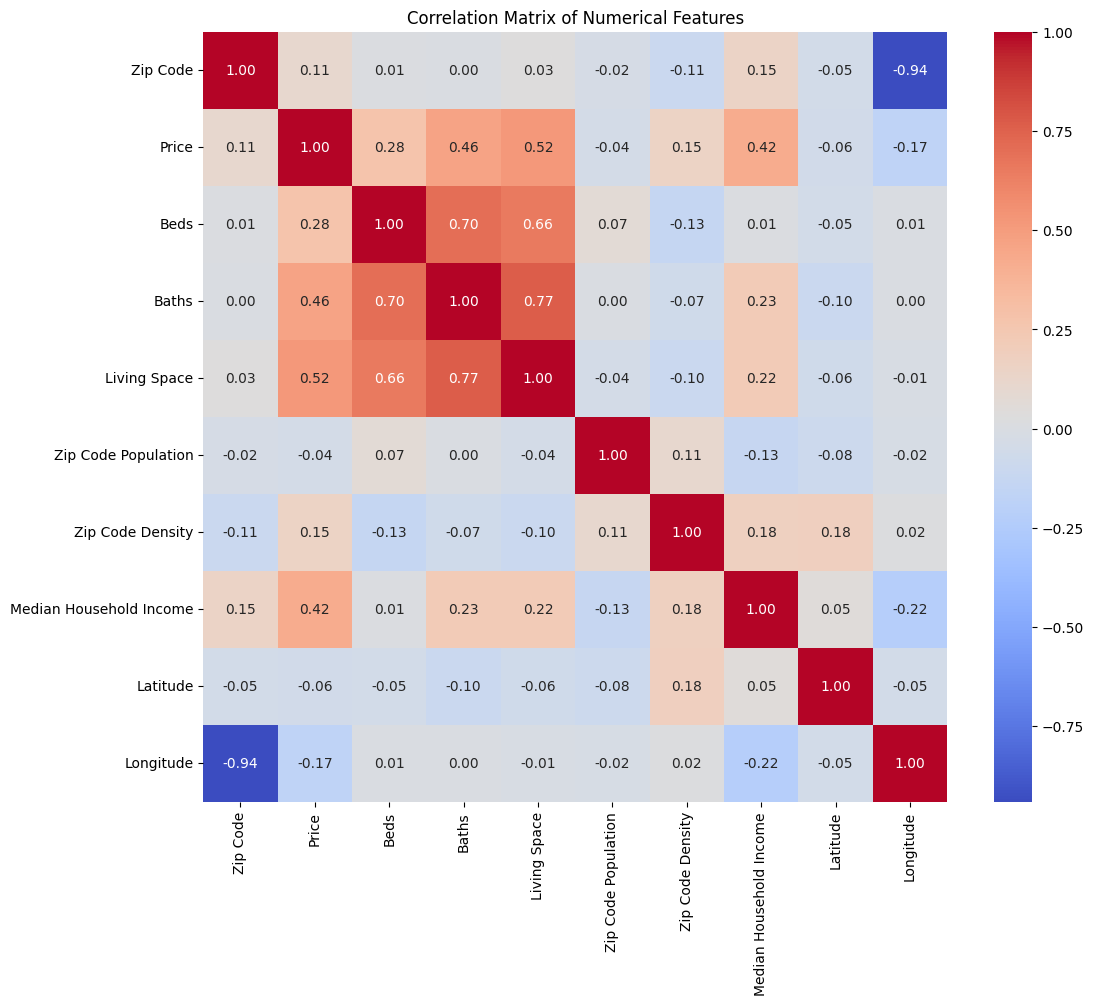

In [5]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

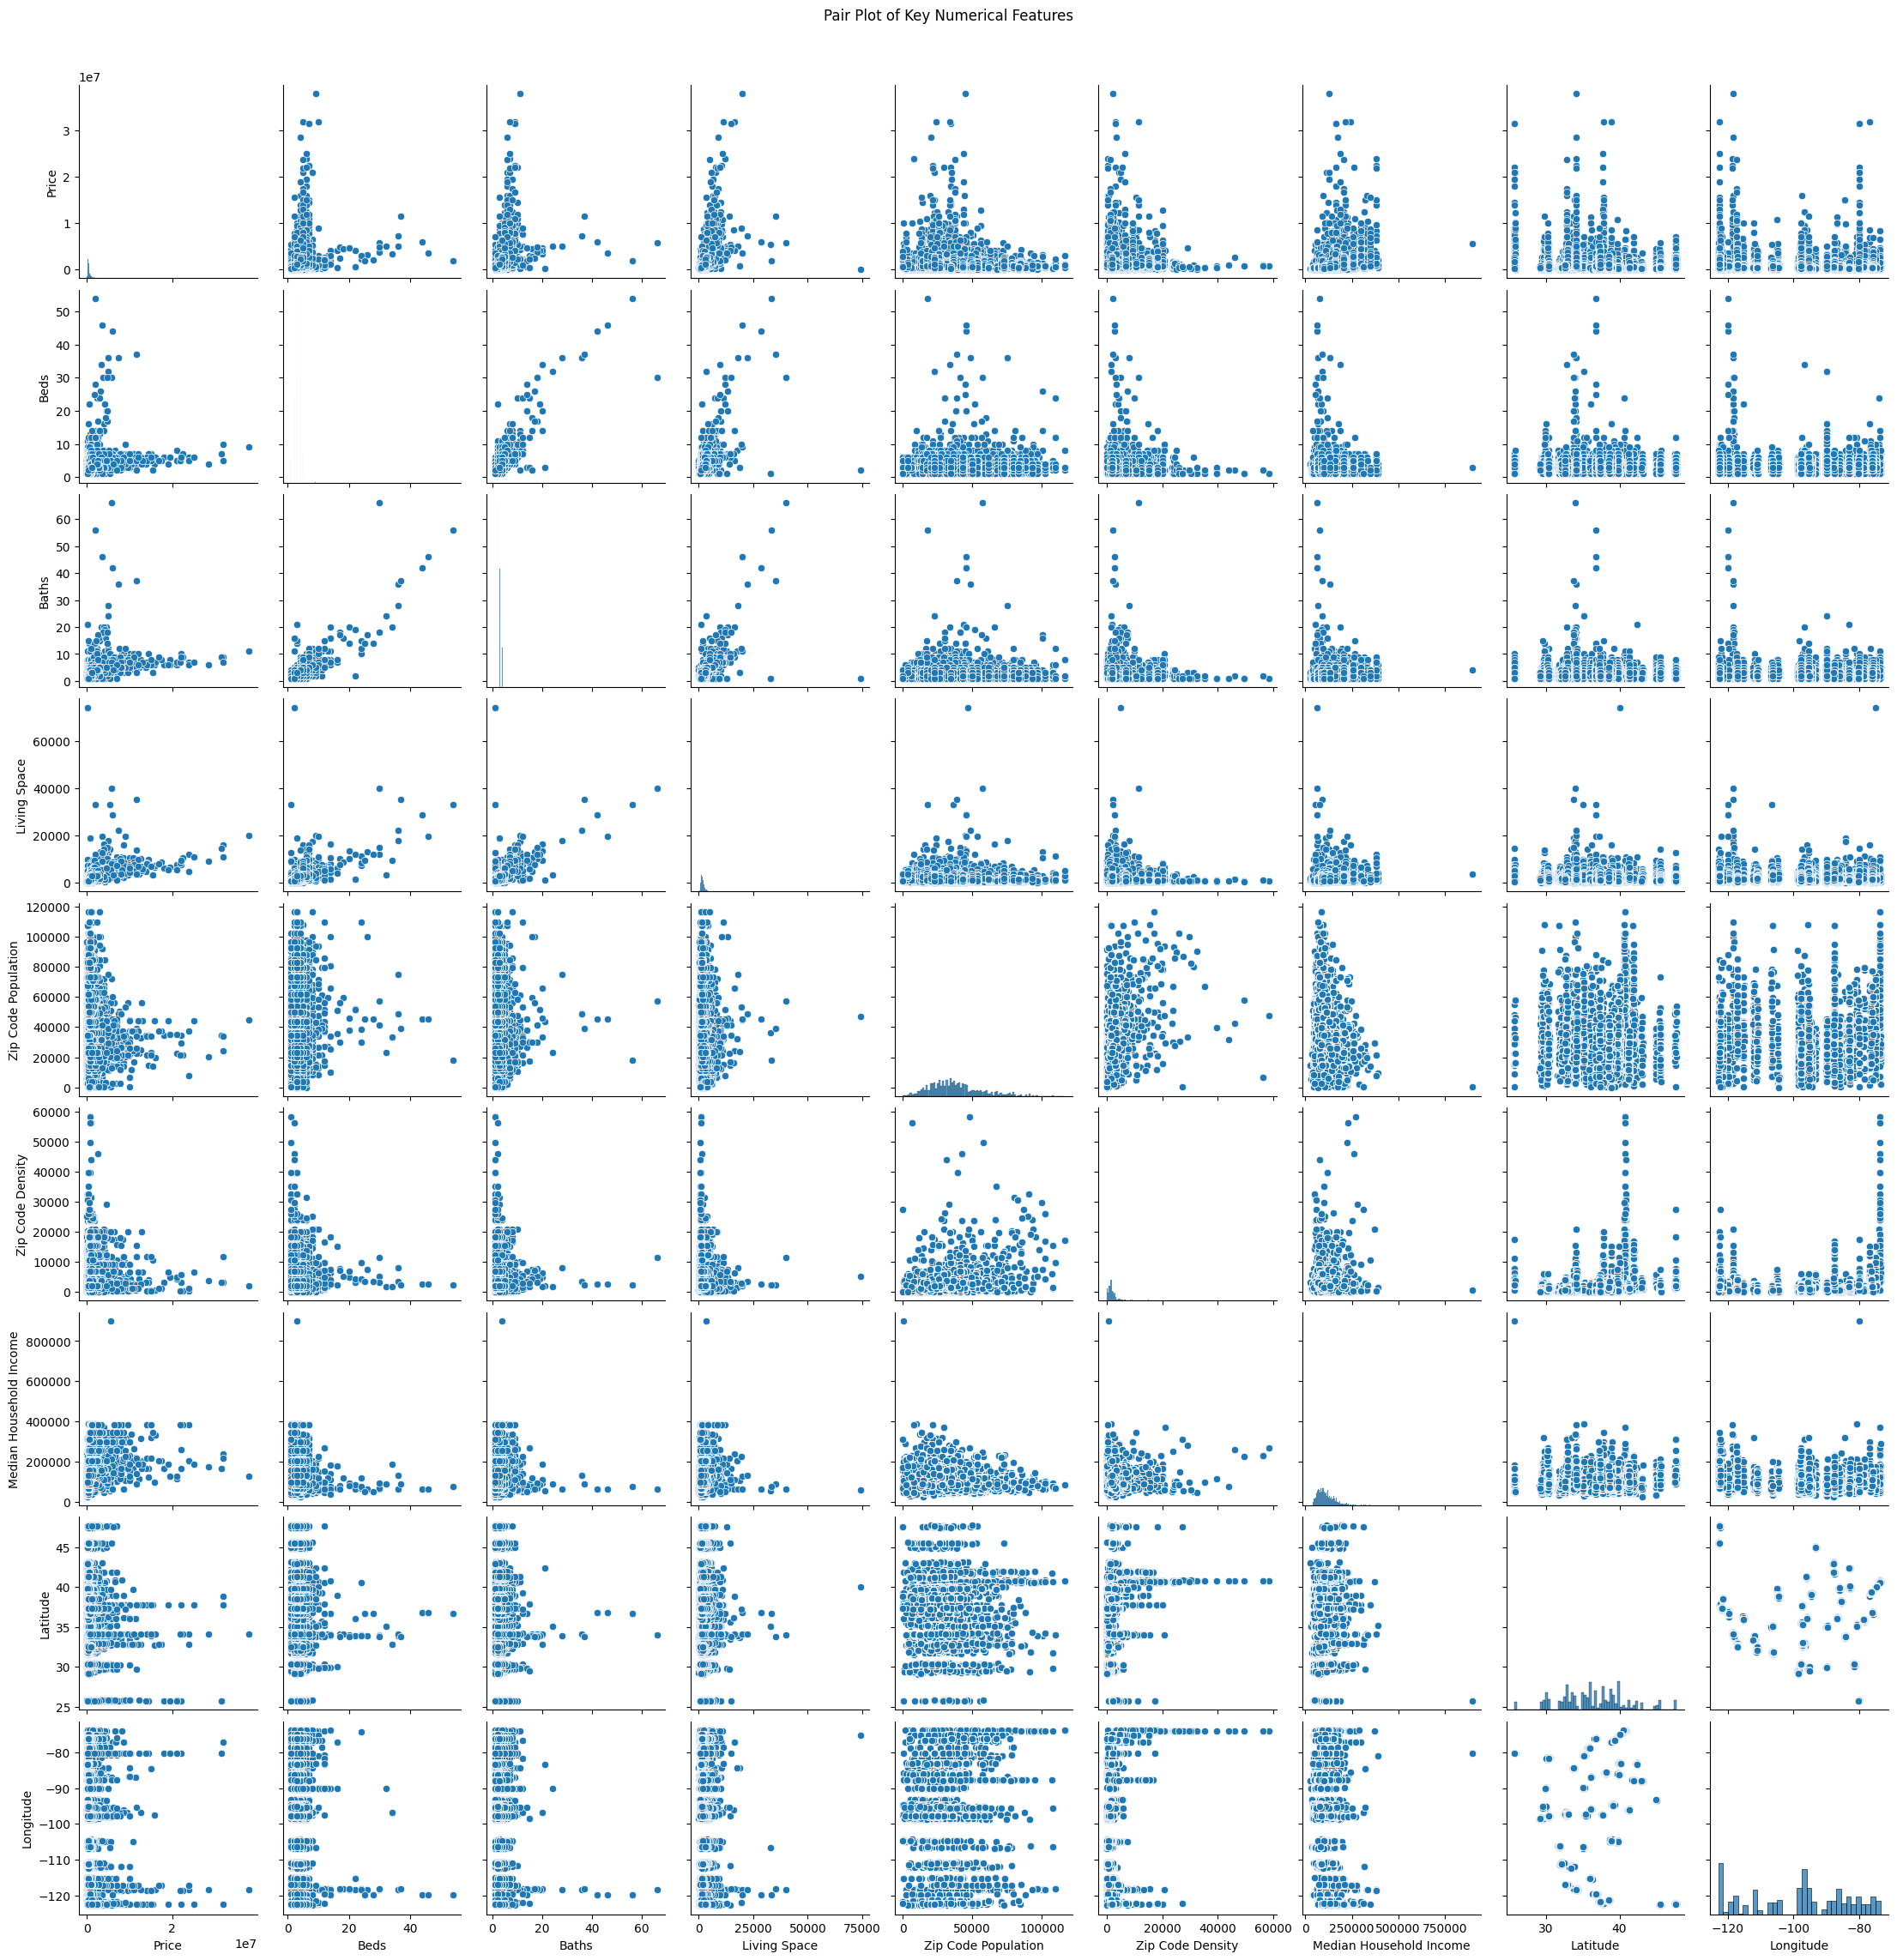

In [6]:
# Generating pair plots for key numerical features to visualize pairwise relationships.

# Create pair plots for a subset of numerical features and the target variable
# Selecting a few key numerical features for pair plot due to the number of features
key_numerical_features = ['Price', 'Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Zip Code Density', 'Median Household Income', 'Latitude', 'Longitude']
sns.pairplot(df[key_numerical_features])
plt.suptitle('Pair Plot of Key Numerical Features', y=1.02)
plt.show()

# Inferential statistics:

To understand the statistical significance of the relationship between 'Living Space' and 'Price', we performed a simple linear regression. We defined 'Living Space' as the independent variable (X) and 'Price' as the dependent variable (y). A constant was added to the independent variable to include an intercept in the model. Using the statsmodels.api library, we created and fitted an OLS (Ordinary Least Squares) model. We then printed the summary of the linear regression model. The summary provided key statistics. It showed the coefficient for 'Living Space', indicating the estimated change in Price for a one-unit increase in Living Space. The p-value for the 'Living Space' coefficient was extremely low (0.000), indicating a statistically significant relationship. The R-squared value showed the proportion of variance in 'Price' explained by 'Living Space'. This test confirmed the positive correlation observed earlier and provided a statistical basis for the relationship.

In [7]:
import statsmodels.api as sm

# Define the independent variable (X) and the dependent variable (y)
X = df['Living Space']
y = df['Price']

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Create a linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                 1.486e+04
Date:                Sat, 28 Jun 2025   Prob (F-statistic):               0.00
Time:                        23:36:01   Log-Likelihood:            -6.0059e+05
No. Observations:               39981   AIC:                         1.201e+06
Df Residuals:                   39979   BIC:                         1.201e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.511e+05   7526.593    -20.073   

In [10]:
import statsmodels.api as sm

# Linear regression for 'Baths' and 'Price'
X_baths = df['Baths']
y = df['Price']

# Add a constant for the intercept
X_baths = sm.add_constant(X_baths)

# Create and fit the model
model_baths = sm.OLS(y, X_baths).fit()

# Print the model summary
print("Linear Regression for Baths and Price:")
print(model_baths.summary())

# Linear regression for 'Median Household Income' and 'Price'
X_income = df['Median Household Income'].dropna() # Drop NaNs for this analysis
y_income = df.loc[X_income.index, 'Price'] # Align y with non-NaN X

# Add a constant for the intercept
X_income = sm.add_constant(X_income)

# Create and fit the model
model_income = sm.OLS(y_income, X_income).fit()

# Print the model summary
print("\nLinear Regression for Median Household Income and Price:")
print(model_income.summary())

Linear Regression for Baths and Price:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                 1.085e+04
Date:                Sun, 29 Jun 2025   Prob (F-statistic):               0.00
Time:                        00:07:32   Log-Likelihood:            -6.0211e+05
No. Observations:               39981   AIC:                         1.204e+06
Df Residuals:                   39979   BIC:                         1.204e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -

In [11]:
# Display descriptive statistics for numerical columns
display(df.describe())

# Display the number of unique values for each categorical column
print("\nUnique values in categorical columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"- {col}: {df[col].nunique()}")

# Display the value counts for a few categorical columns to see distribution
print("\nValue counts for selected categorical columns:")
for col in ['State', 'City']: # You can add more categorical columns here if needed
    if col in df.columns:
        print(f"\nValue counts for {col}:")
        display(df[col].value_counts().head()) # Displaying head for brevity

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
count,39981.000000,3.998100e+04,39981.000000,39981.000000,39981.000000,39981.000000,39981.000000,39979.000000,39981.000000,39981.000000
mean,64833.391336,6.227771e+05,3.171682,2.466572,1901.522723,37726.201996,2379.412483,110837.259861,36.435668,-98.080576
std,25614.601116,9.469793e+05,1.308796,1.323042,1211.307257,18672.647445,2946.574792,47309.055715,4.446862,15.061145
min,10013.000000,1.800000e+03,1.000000,1.000000,2.000000,0.000000,0.000000,27475.000000,25.729830,-122.826870
25%,40215.000000,2.650000e+05,3.000000,2.000000,1200.000000,24465.000000,902.400000,76640.000000,33.239850,-111.636310
50%,74136.000000,3.999000e+05,3.000000,2.000000,1639.000000,35049.000000,1588.700000,100405.000000,36.166620,-96.839680
75%,85730.000000,6.749900e+05,4.000000,3.000000,2265.000000,46816.000000,2736.800000,135075.000000,39.283090,-85.656980
max,98199.000000,3.800000e+07,54.000000,66.000000,74340.000000,116469.000000,58289.600000,900203.000000,47.742370,-73.704510



Unique values in categorical columns:
- Address: 38827
- City: 243
- State: 29
- County: 88

Value counts for selected categorical columns:

Value counts for State:


,count
State,
California,6056
Texas,5894
Arizona,2640
North Carolina,1777
Colorado,1774



Value counts for City:


,count
City,
Charlotte,894
Mesa,894
Las Vegas,892
Denver,888
Albuquerque,883


## Feature Selection and Engineering

For Feature Selection and Engineering, we focused on preparing the data for potential modeling.

Feature Selection: Based on our exploratory analysis, we selected a set of numerical features ('Living Space', 'Beds', 'Baths', 'Zip Code Population', 'Zip Code Density', 'Median Household Income', 'Latitude', 'Longitude') and categorical features ('State', 'City') that appeared most relevant to predicting 'Price'. The target variable 'Price' was also included.
Handling Missing Data: We checked for missing values in the selected numerical features and found missing values in 'Median Household Income'. We imputed these missing values with the median value of the column to ensure the dataset is complete for modeling.
Handling Categorical Variables: To incorporate the selected categorical features into a model, we applied One-Hot Encoding to the 'State' and 'City' columns. This process converts each category into a new binary column, which is suitable for many machine learning algorithms. We used drop_first=True to avoid multicollinearity.
Feature Scaling: As an optional but often beneficial step for certain models, we scaled the selected numerical features using MinMaxScaler. This transforms the values of these features to a common range (between 0 and 1), which can help improve the performance of algorithms sensitive to feature scales.

In [12]:
# 1. Select relevant features
# Based on our analysis, let's select some key numerical and categorical features
numerical_features = ['Living Space', 'Beds', 'Baths', 'Zip Code Population', 'Zip Code Density', 'Median Household Income', 'Latitude', 'Longitude']
categorical_features = ['State', 'City'] # Starting with State and City, can add County later if needed

# Combine features
features = numerical_features + categorical_features
df_selected = df[features + ['Price']].copy() # Include the target variable 'Price'

# 2. Handle Missing Data
# We observed missing values in 'Median Household Income'. Let's impute with the median.
for col in numerical_features:
    if df_selected[col].isnull().sum() > 0:
        median_val = df_selected[col].median()
        df_selected[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in '{col}' with median: {median_val}")

# Verify no missing values remain in selected numerical columns
print("\nMissing values after imputation:")
display(df_selected[numerical_features].isnull().sum())


# 3. Handle Categorical Variables
# Use One-Hot Encoding for selected categorical features
df_processed = pd.get_dummies(df_selected, columns=categorical_features, drop_first=True)

# 4. Optional: Feature Scaling (for numerical features)
# Scaling can be beneficial for some models (e.g., distance-based models)
# Let's scale the numerical features using MinMaxScaler
scaler = MinMaxScaler()
df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])

print("\nProcessed DataFrame with engineered features:")
display(df_processed.head())
print("\nShape of the processed DataFrame:", df_processed.shape)

Filled missing values in 'Median Household Income' with median: 100405.0

Missing values after imputation:


/tmp/ipython-input-12-1922770754.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected[col].fillna(median_val, inplace=True)


,0
Living Space,0
Beds,0
Baths,0
Zip Code Population,0
Zip Code Density,0
Median Household Income,0
Latitude,0
Longitude,0



Processed DataFrame with engineered features:


,Living Space,Beds,Baths,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude,Price,State_California,State_Colorado,State_District of Columbia,State_Florida,State_Georgia,State_Illinois,State_Indiana,State_Kansas,State_Kentucky,State_Louisiana,State_Maryland,State_Michigan,State_Minnesota,State_Missouri,State_Nebraska,State_Nevada,State_New Mexico,State_New York,State_North Carolina,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Tennessee,State_Texas,State_Virginia,State_Washington,State_Wisconsin,City_Aledo,City_Apache Junction,City_Arlington,City_Arverne,City_Astoria,City_Atascosa,City_Atlanta,City_Atlantic Beach,City_Austin,City_Baltimore,City_Bayside,City_Bellerose,City_Bellevue,City_Bennington,City_Berkeley,City_Beverly Hills,City_Blacklick,City_Boerne,City_Broken Arrow,City_Bronx,City_Brooklyn,City_Brownsburg,City_Burbank,City_Burleson,City_Calhan,City_Cambria Heights,City_Campbell,City_Canal Winchester,City_Canoga Park,City_Catonsville,City_Cave Creek,City_Charlotte,City_Chatsworth,City_Chesapeake,City_Chicago,City_Choctaw,City_Clint,City_College Point,City_Colorado Springs,City_Columbus,City_Converse,City_Cordova,City_Corona,City_Crowley,City_Culver City,City_Curtis Bay,City_Dallas,City_Del Mar,City_Denver,City_Detroit,City_Dublin,City_Dundalk,City_Durham,City_East Elmhurst,City_Edmond,City_El Paso,City_Elkhorn,City_Elmhurst,City_Elmwood Park,City_Emeryville,City_Encino,City_Englewood,City_Essex,City_Euless,City_Fairdale,City_Far Rockaway,City_Fisherville,City_Floral Park,City_Flushing,City_Forest Hills,City_Fort Worth,City_Fresh Meadows,City_Fresno,City_Friant,City_Galloway,City_Garner,City_Glen Oaks,City_Glendale,City_Granada Hills,City_Grand Prairie,City_Greendale,City_Greenfield,City_Gretna,City_Grosse Pointe,City_Grove City,City_Groveport,City_Gwynn Oak,City_Hamtramck,City_Hanford,City_Harbor City,City_Harper Woods,City_Haslet,City_Haysville,City_Henderson,City_Highland Park,City_Hilliard,City_Hollis,City_Houston,City_Howard Beach,City_Huffman,City_Huntersville,City_Indianapolis,City_Jackson Heights,City_Jacksonville,City_Jacksonville Beach,City_Jamaica,City_Jones,City_Justin,City_Kansas City,City_Keller,City_Kerman,City_Kew Gardens,City_Knightdale,City_La Jolla,City_Lakewood,City_Las Vegas,City_Laveen,City_Lewis Center,City_Little Neck,City_Littleton,City_Lockbourne,City_Long Beach,City_Long Island City,City_Los Angeles,City_Louisville,City_Madison,City_Maize,City_Manchaca,City_Manor,City_Marina Del Rey,City_Maspeth,City_Matthews,City_Memphis,City_Mesa,City_Miami,City_Miami Beach,City_Middle Village,City_Milpitas,City_Milwaukee,City_Minneapolis,City_Mission Hills,City_Missouri City,City_Mount Hamilton,City_Mustang,City_Nashville,City_National City,City_New Albany,City_New Orleans,City_New River,City_New York,City_Newalla,City_North Hills,City_North Hollywood,City_North Las Vegas,City_Northridge,City_Oakland,City_Oakland Gardens,City_Oklahoma City,City_Omaha,City_Ozone Park,City_Pacific Palisades,City_Pacoima,City_Panorama City,City_Paradise Valley,City_Parkville,City_Philadelphia,City_Phoenix,City_Pickerington,City_Piedmont,City_Pikesville,City_Playa Del Rey,City_Playa Vista,City_Ponte Vedra,City_Porter Ranch,City_Portland,City_Poteet,City_Powell,City_Prospect,City_Queen Creek,City_Queens Village,City_Raleigh,City_Redford,City_Rego Park,City_Reseda,City_Reynoldsburg,City_Roanoke,City_Rockaway Park,City_Rosedale,City_Sacramento,City_Saint Francis,City_Saint Johns,City_San Antonio,City_San Diego,City_San Fernando,City_San Francisco,City_San Jose,City_San Leandro,City_San Pedro,City_San Ysidro,City_Santa Clara,City_Santa Monica,City_Schertz,City_Scottsdale,City_Seattle,City_Shepherdsville,City_Sherman Oaks,City_South Ozone Park,City_South Richmond Hill,City_Spencer,City_Spicewood,City_Springfield Gardens,City_Stafford,City_Staten Island,City_Studio City,City_Sun Valley,City_Sunland,City_Sunnyside,City_Sylmar,City_Tarzana,City_Tolleson,City_Towson,City_Tucson,City_Tujunga,C


Shape of the processed DataFrame: (39981, 279)


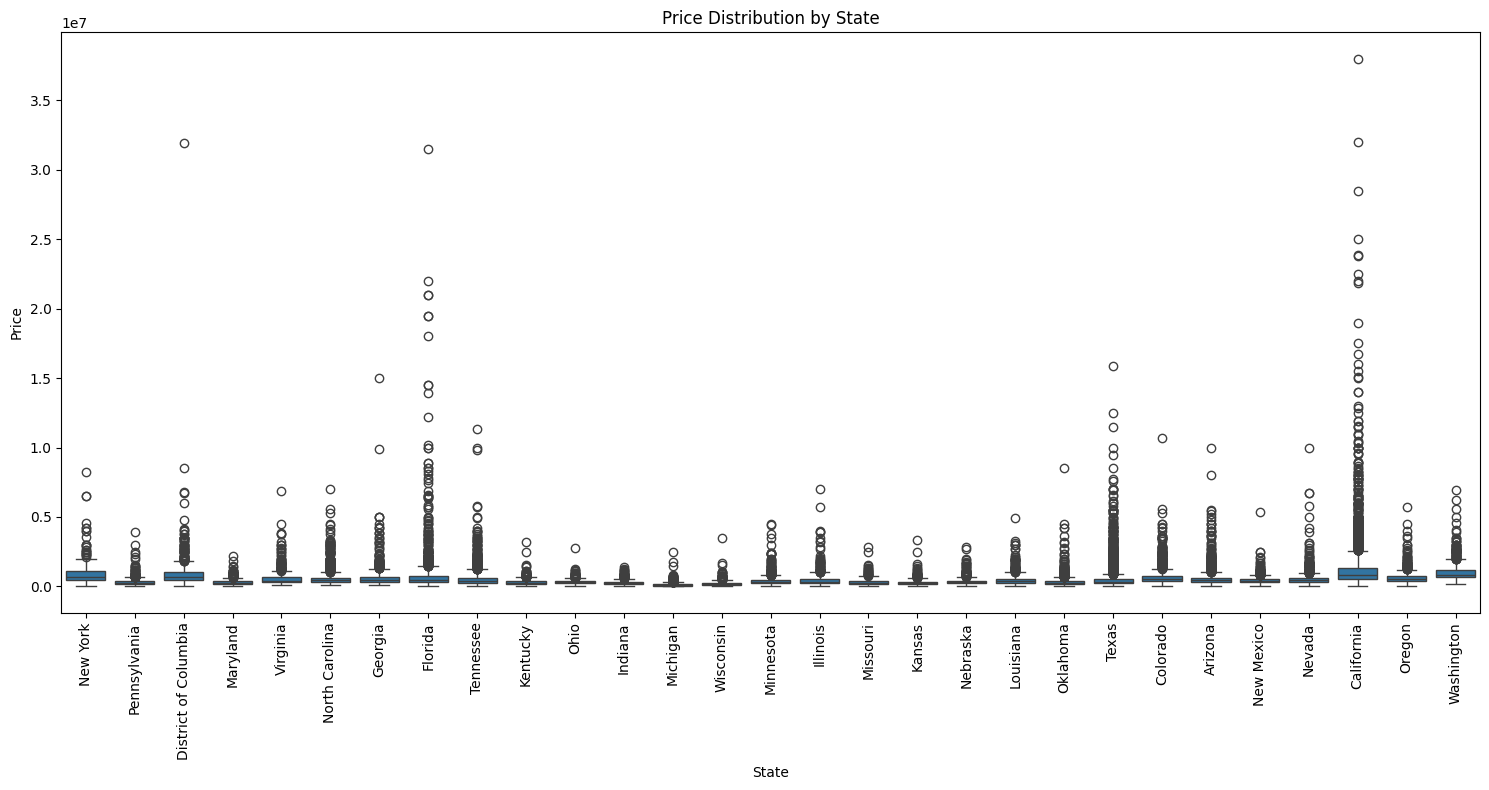

In [8]:
# Analyze the relationship between 'State' and 'Price' using a box plot
plt.figure(figsize=(15, 8))
sns.boxplot(x='State', y='Price', data=df)
plt.title('Price Distribution by State')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.xlabel('State')
plt.tight_layout()
plt.show()